In [2]:
import pandas as pd
import requests 
import json
import polars as pl
from IPython.display import Image


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
response = requests.get('https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationById/?stationId=13447')

In [25]:
print(response)

<Response [200]>



## Exploring API endpoints of Gaugemap

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationById/?stationId=13455
https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=13455&dataType=3&endTime=2023-08-02T22%3A59%3A59&startTime=2023-07-26T23%3A00%3A00&smoothing=0
https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=13457&dataType=3&endTime=2023-08-02T22%3A59%3A59&startTime=2023-07-29T23%3A00%3A00&smoothing=0

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationById/?stationId=453
https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=13457&dataType=3&endTime=2023-08-02T22%3A59%3A59&startTime=2023-07-29T23%3A00%3A00&smoothing=0

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByRiverGroupingKey/?riverGroupingKey=Northmoor+Main+Drain%3A0

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByCatchmentName/?catchmentName=Thames+from+Hurley+to+Teddington

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByCatchmentName/?catchmentName=Exe

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByRiverGroupingKey/?riverGroupingKey=Dawlish+Water%3A0

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByCatchmentName/?catchmentName=Exe

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=9051&dataType=3&endTime=2023-08-31T22%3A59%3A59&startTime=2023-04-30T23%3A00%3A00&smoothing=2

https://iwaponline.com/wpt/article/17/4/914/88189/River-flow-modelling-for-flood-prediction-using : INSPO : They use 'runoff data' as well

In [4]:

#build requests
url = "https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByCatchmentName/?catchmentName=Exe"

headers = {
    "Accept": "application/json, text/javascript, */*; q=0.01",
    "Origin": "https://www.gaugemap.co.uk",
    "Referer": "https://www.gaugemap.co.uk/",
    "SessionHeaderId": "03173723-4dea-4c81-8d8e-5c808698384b",  # Need to rotate session/ user-agent headers
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36",
}

response = requests.get(url, headers=headers)

data = response.json()  # if the response is in JSON format



In [79]:
#snippet below returns river levels at given timestamps

r1 = requests.get('https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=9051&dataType=3&endTime=2023-08-31T22%3A59%3A59&startTime=2013-04-30T23%3A00%3A00&smoothing=2', headers=headers)



data = r1.json()
data
df1 = pd.json_normalize(data)
df1[['values']].to_csv('values.csv')



# THE RESULT SHOWN BELOW:



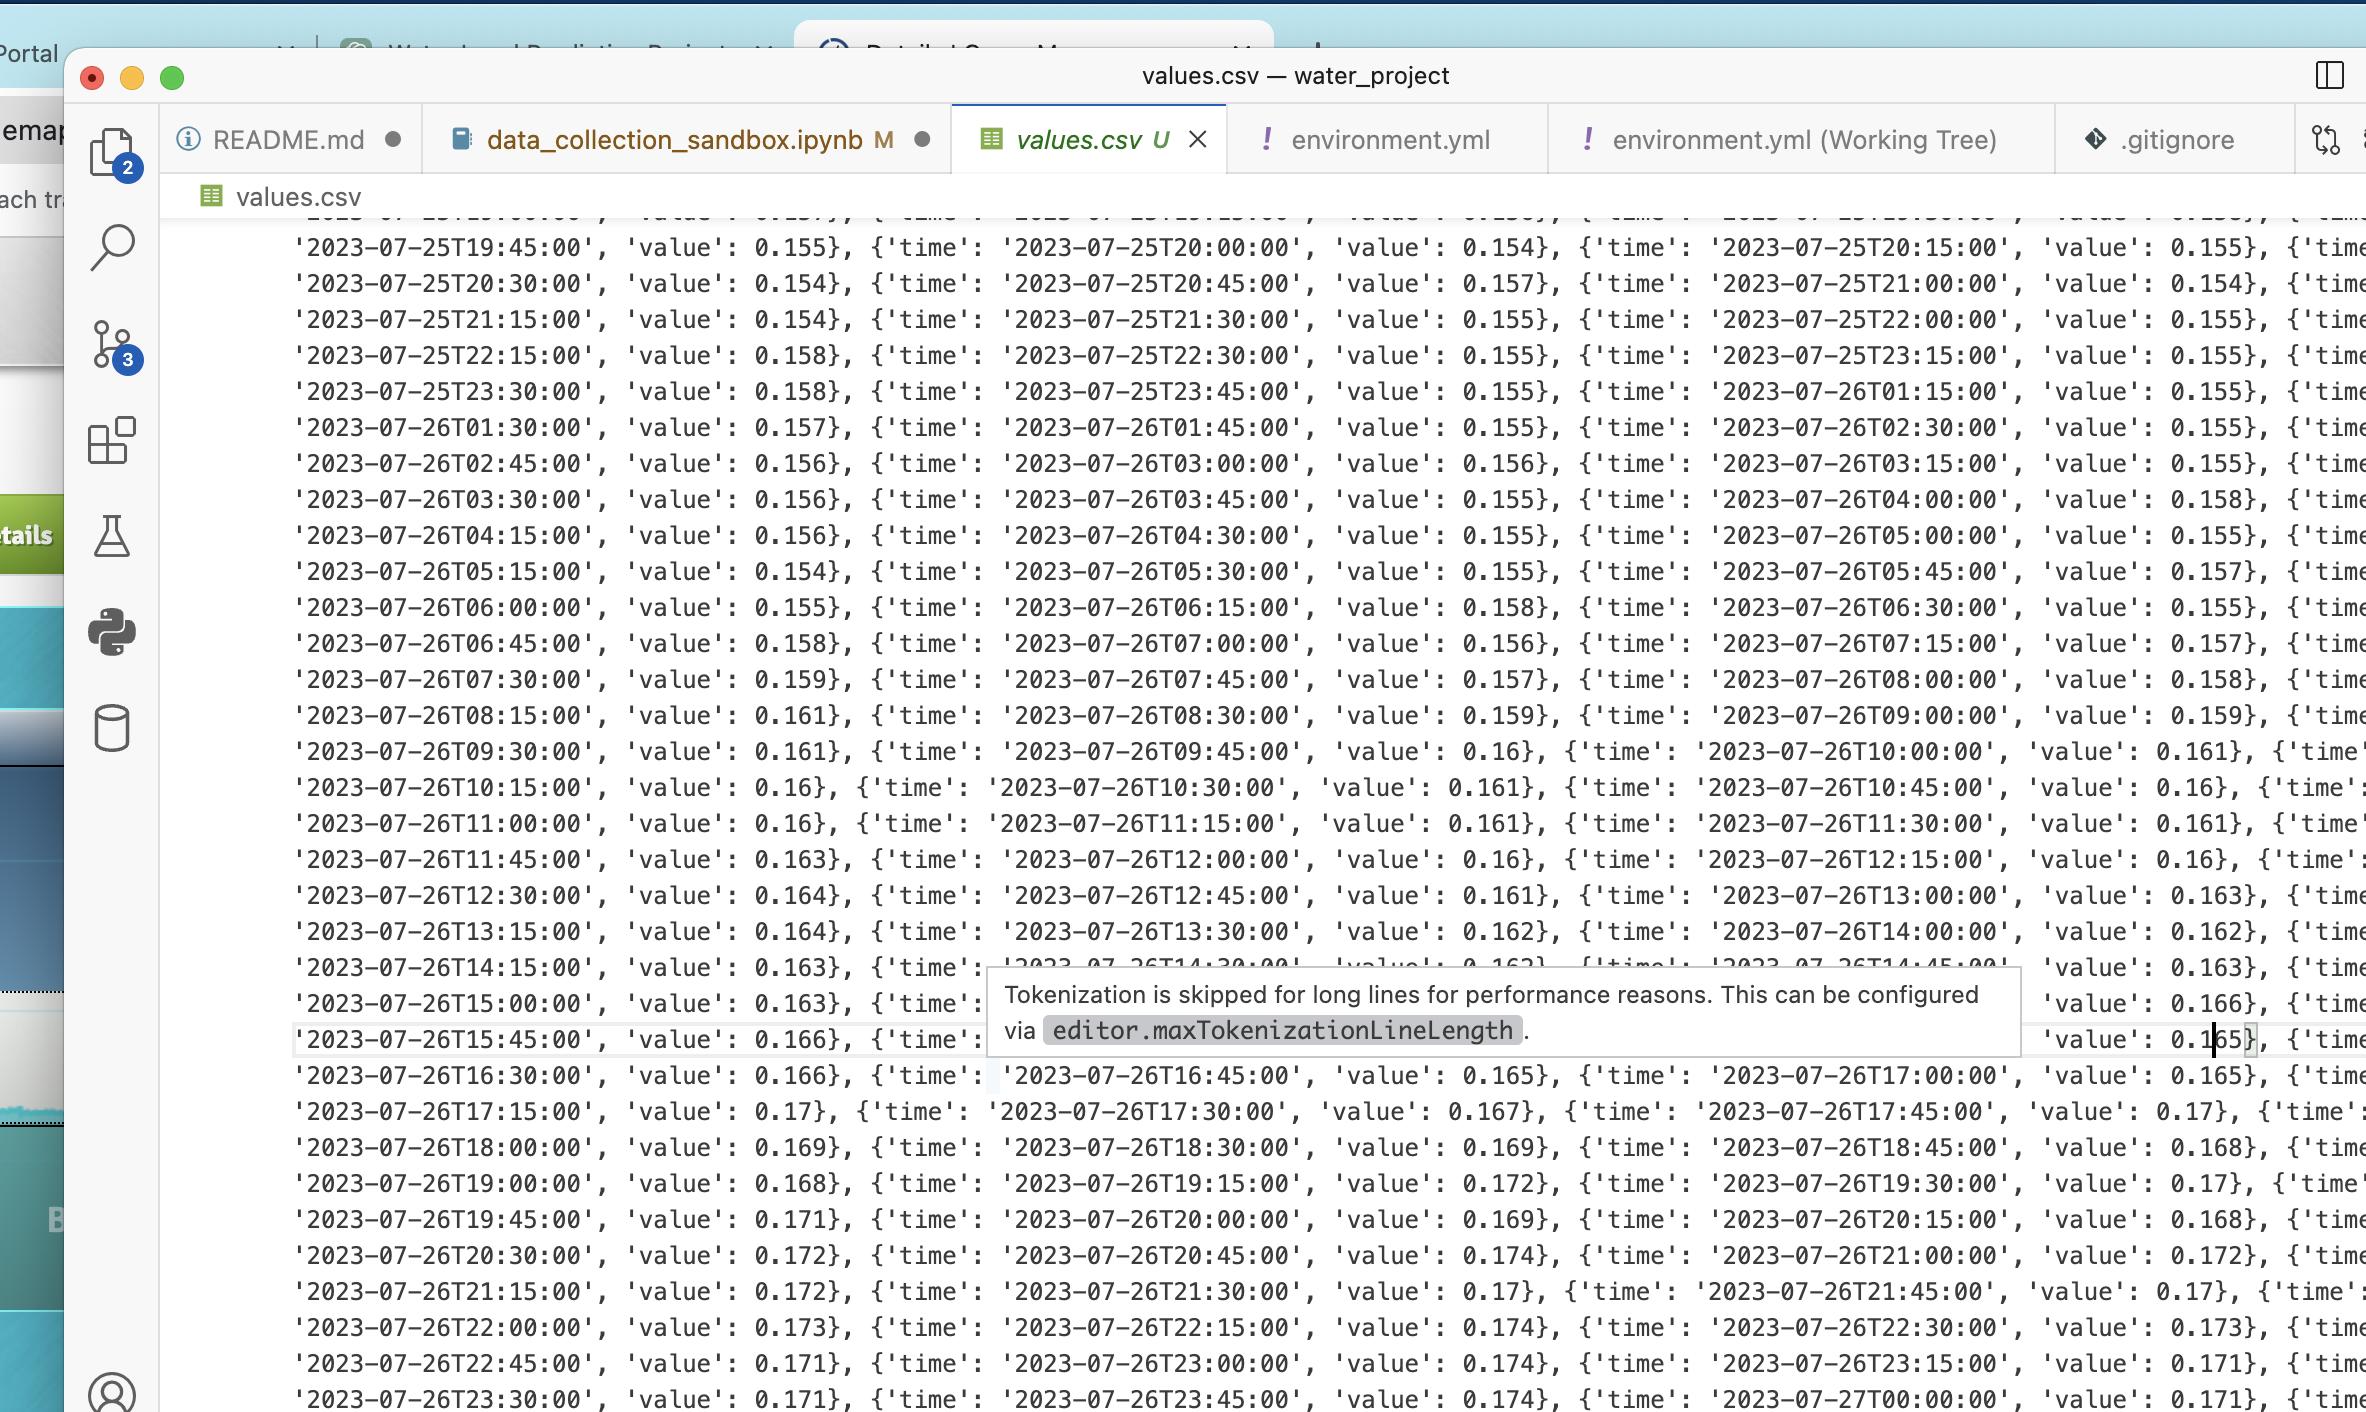

In [8]:
Image(filename='/Users/antonfreidin/water_project/screenshots for decoration/Screenshot 2023-08-02 at 17.50.24.png')

In [13]:
df_exe = pd.DataFrame(data)

In [20]:
df_exe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   dataType                         0 non-null      object 
 1   id                               33 non-null     int64  
 2   name                             33 non-null     object 
 3   description                      33 non-null     object 
 4   latitude                         33 non-null     float64
 5   longitude                        33 non-null     float64
 6   stationOwner                     33 non-null     int64  
 7   state                            33 non-null     int64  
 8   updatedTime                      33 non-null     object 
 9   additionalDataObject             33 non-null     object 
 10  gaugeList                        33 non-null     object 
 11  stationWaterLevelStatisticsType  33 non-null     int64  
dtypes: float64(2), int64(4),

In [21]:
df_exe.describe()

id   latitude  longitude  stationOwner  state  \
count     33.000000  33.000000  33.000000     33.000000   33.0   
mean    4284.121212  50.847760  -3.501569      7.969697    0.0   
std     6476.179872   0.155206   0.094607     13.588793    0.0   
min      268.000000  50.580500  -3.758500      3.000000    0.0   
25%      276.000000  50.733166  -3.531354      3.000000    0.0   
50%      284.000000  50.820968  -3.489849      3.000000    0.0   
75%     9051.000000  50.989192  -3.454340      3.000000    0.0   
max    16488.000000  51.138300  -3.279956     44.000000    0.0   

       stationWaterLevelStatisticsType  
count                        33.000000  
mean                          2.606061  
std                           0.933387  
min                           2.000000  
25%                           2.000000  
50%                           2.000000  
75%                           4.000000  
max                           4.000000

In [22]:
additional_data_exe= pd.json_normalize(df_exe['additionalDataObject'])
additional_data_exe.columns

Index(['stationReference', 'catchmentName', 'riverName', 'elevation',
       'stationType', 'region', 'ordinal', 'riverGroupingId',
       'riverGroupingName', 'siteId', 'stageDatum', 'dateOpen', 'town',
       'areaName', 'rloIid', 'notation', 'wiskiID', 'farsonId', 'code',
       'urlName'],
      dtype='object')

In [23]:
df_exe.columns

Index(['dataType', 'id', 'name', 'description', 'latitude', 'longitude',
       'stationOwner', 'state', 'updatedTime', 'additionalDataObject',
       'gaugeList', 'stationWaterLevelStatisticsType'],
      dtype='object')

WHICH Data to gather? 

Gauges for last ten years : https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=9051&dataType=3&endTime=2023-08-31T22%3A59%3A59&startTime=2013-04-30T23%3A00%3A00&smoothing=2

## SOMERSET GAUGES

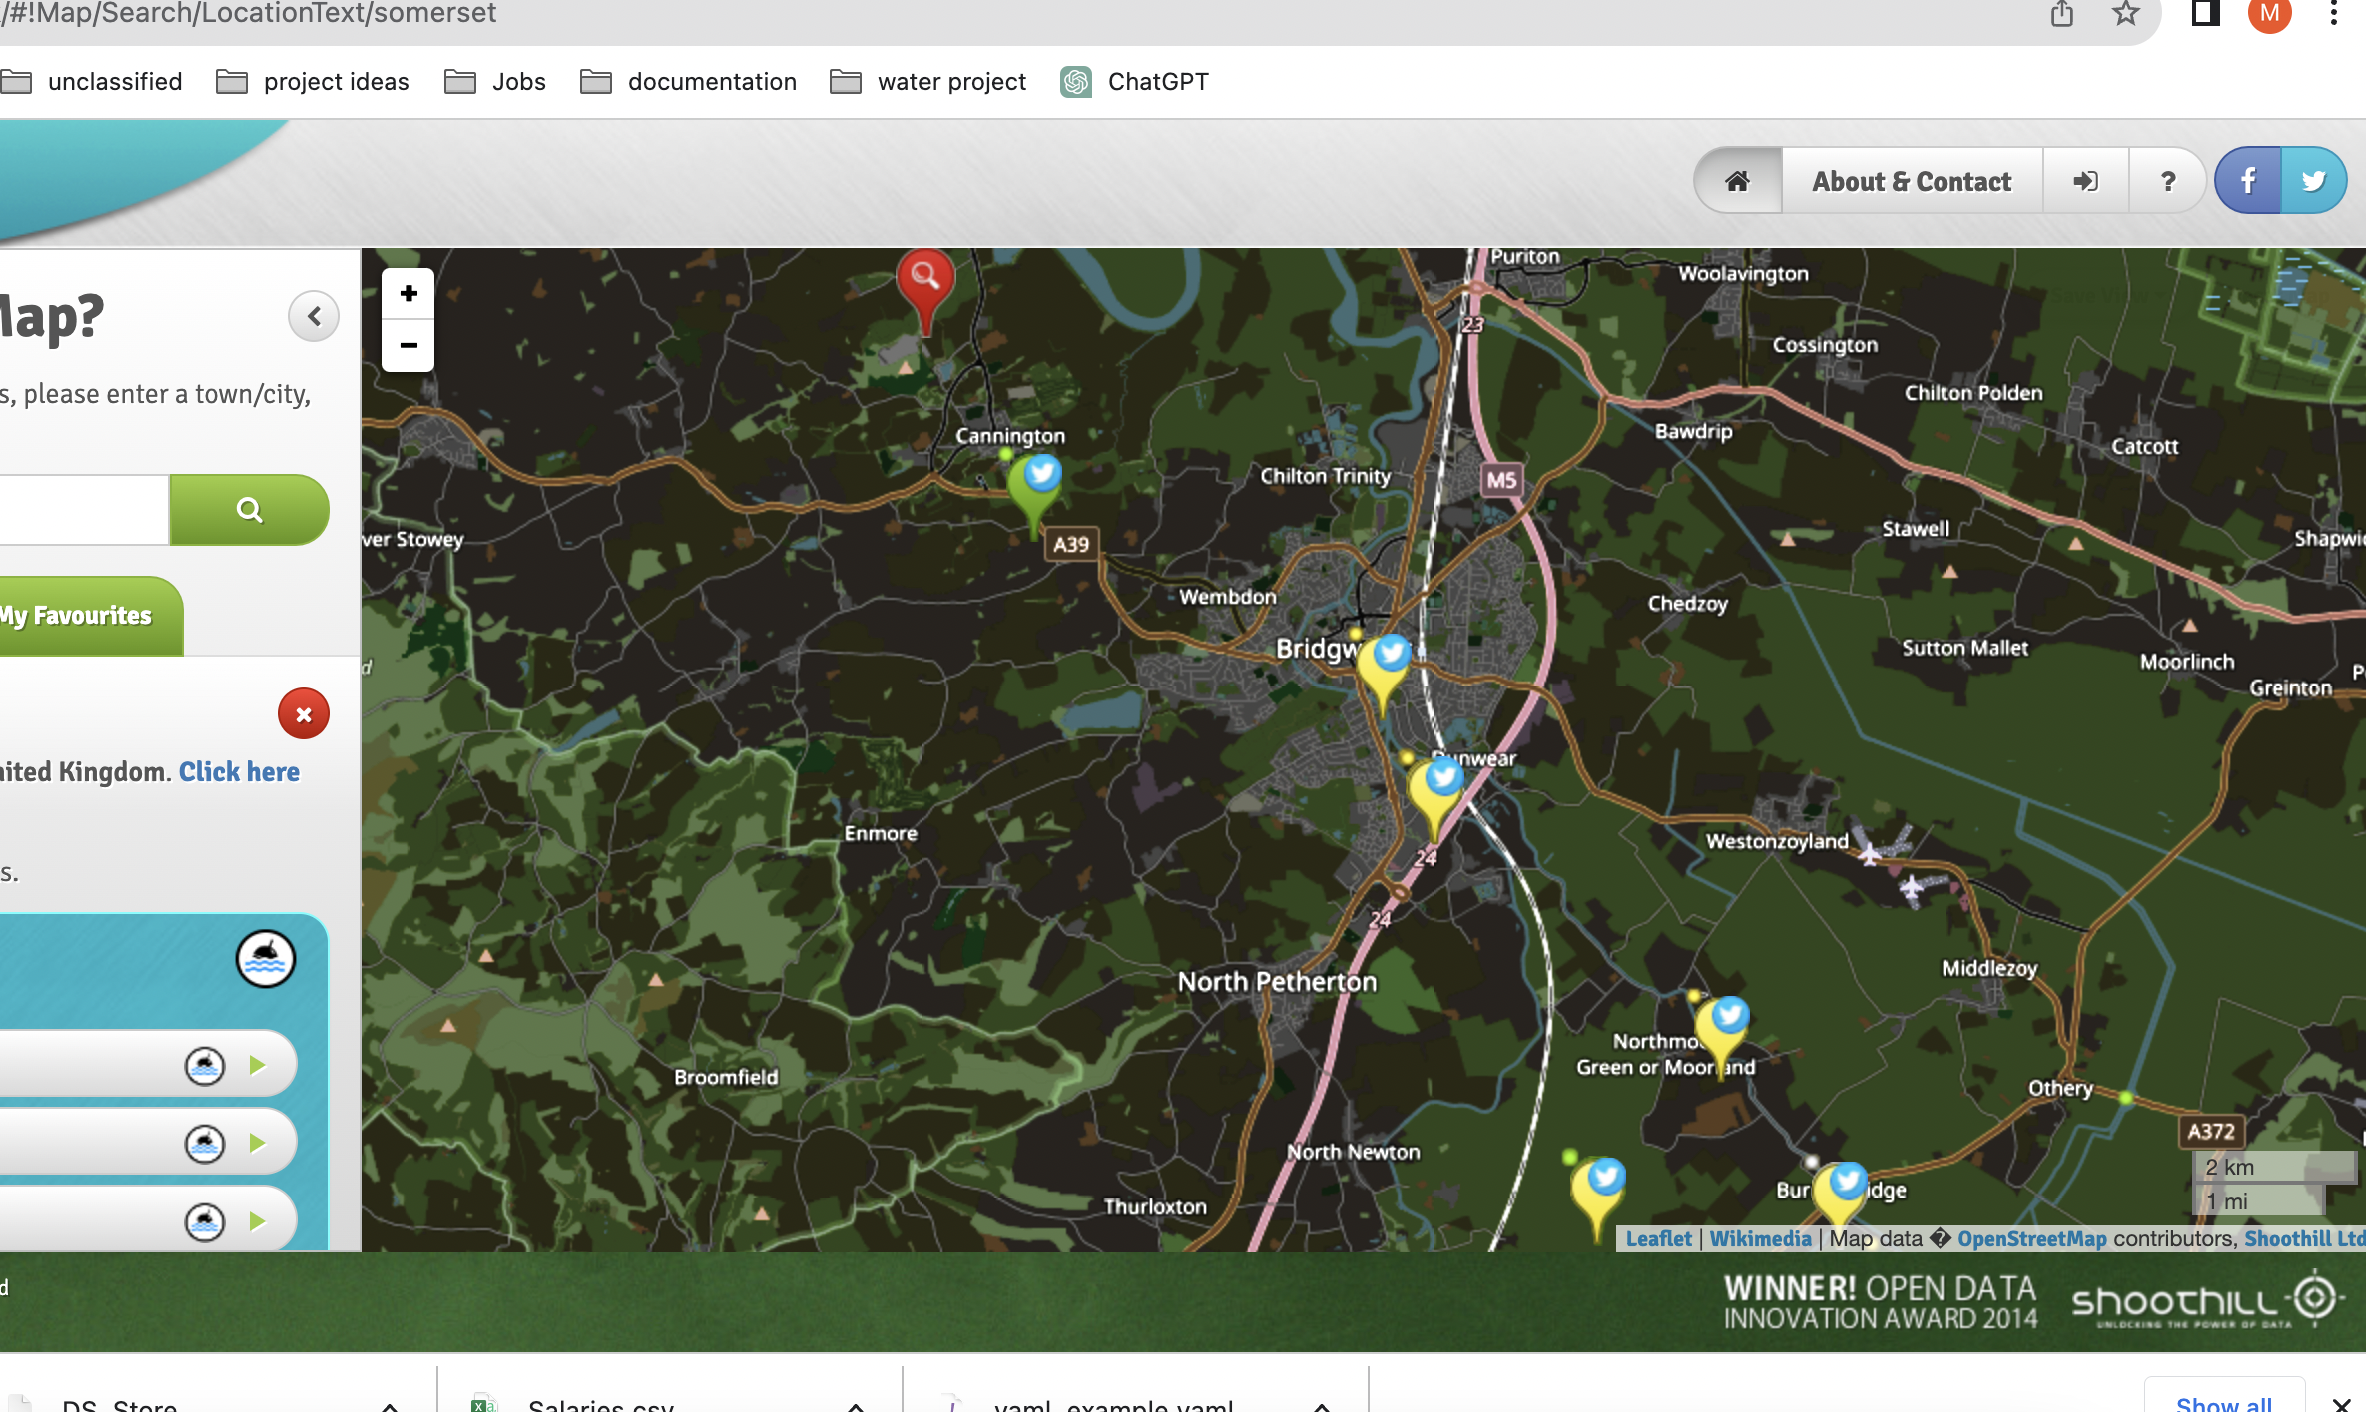

In [2]:

Image(filename="/Users/antonfreidin/water_project/screenshots for decoration/Screenshot 2023-08-03 at 14.15.02.png")

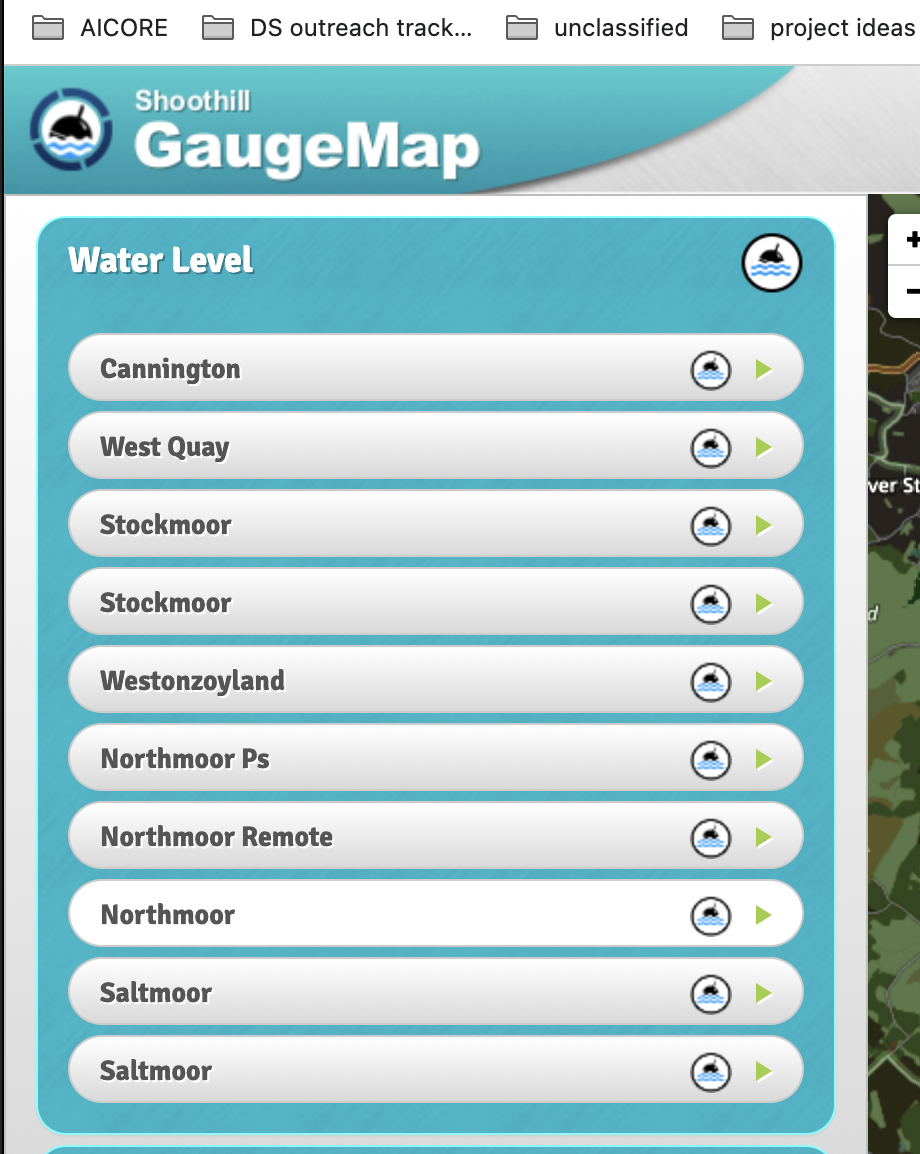

In [3]:
Image(filename="/Users/antonfreidin/Desktop/Screenshot 2023-08-03 at 14.21.13.png")

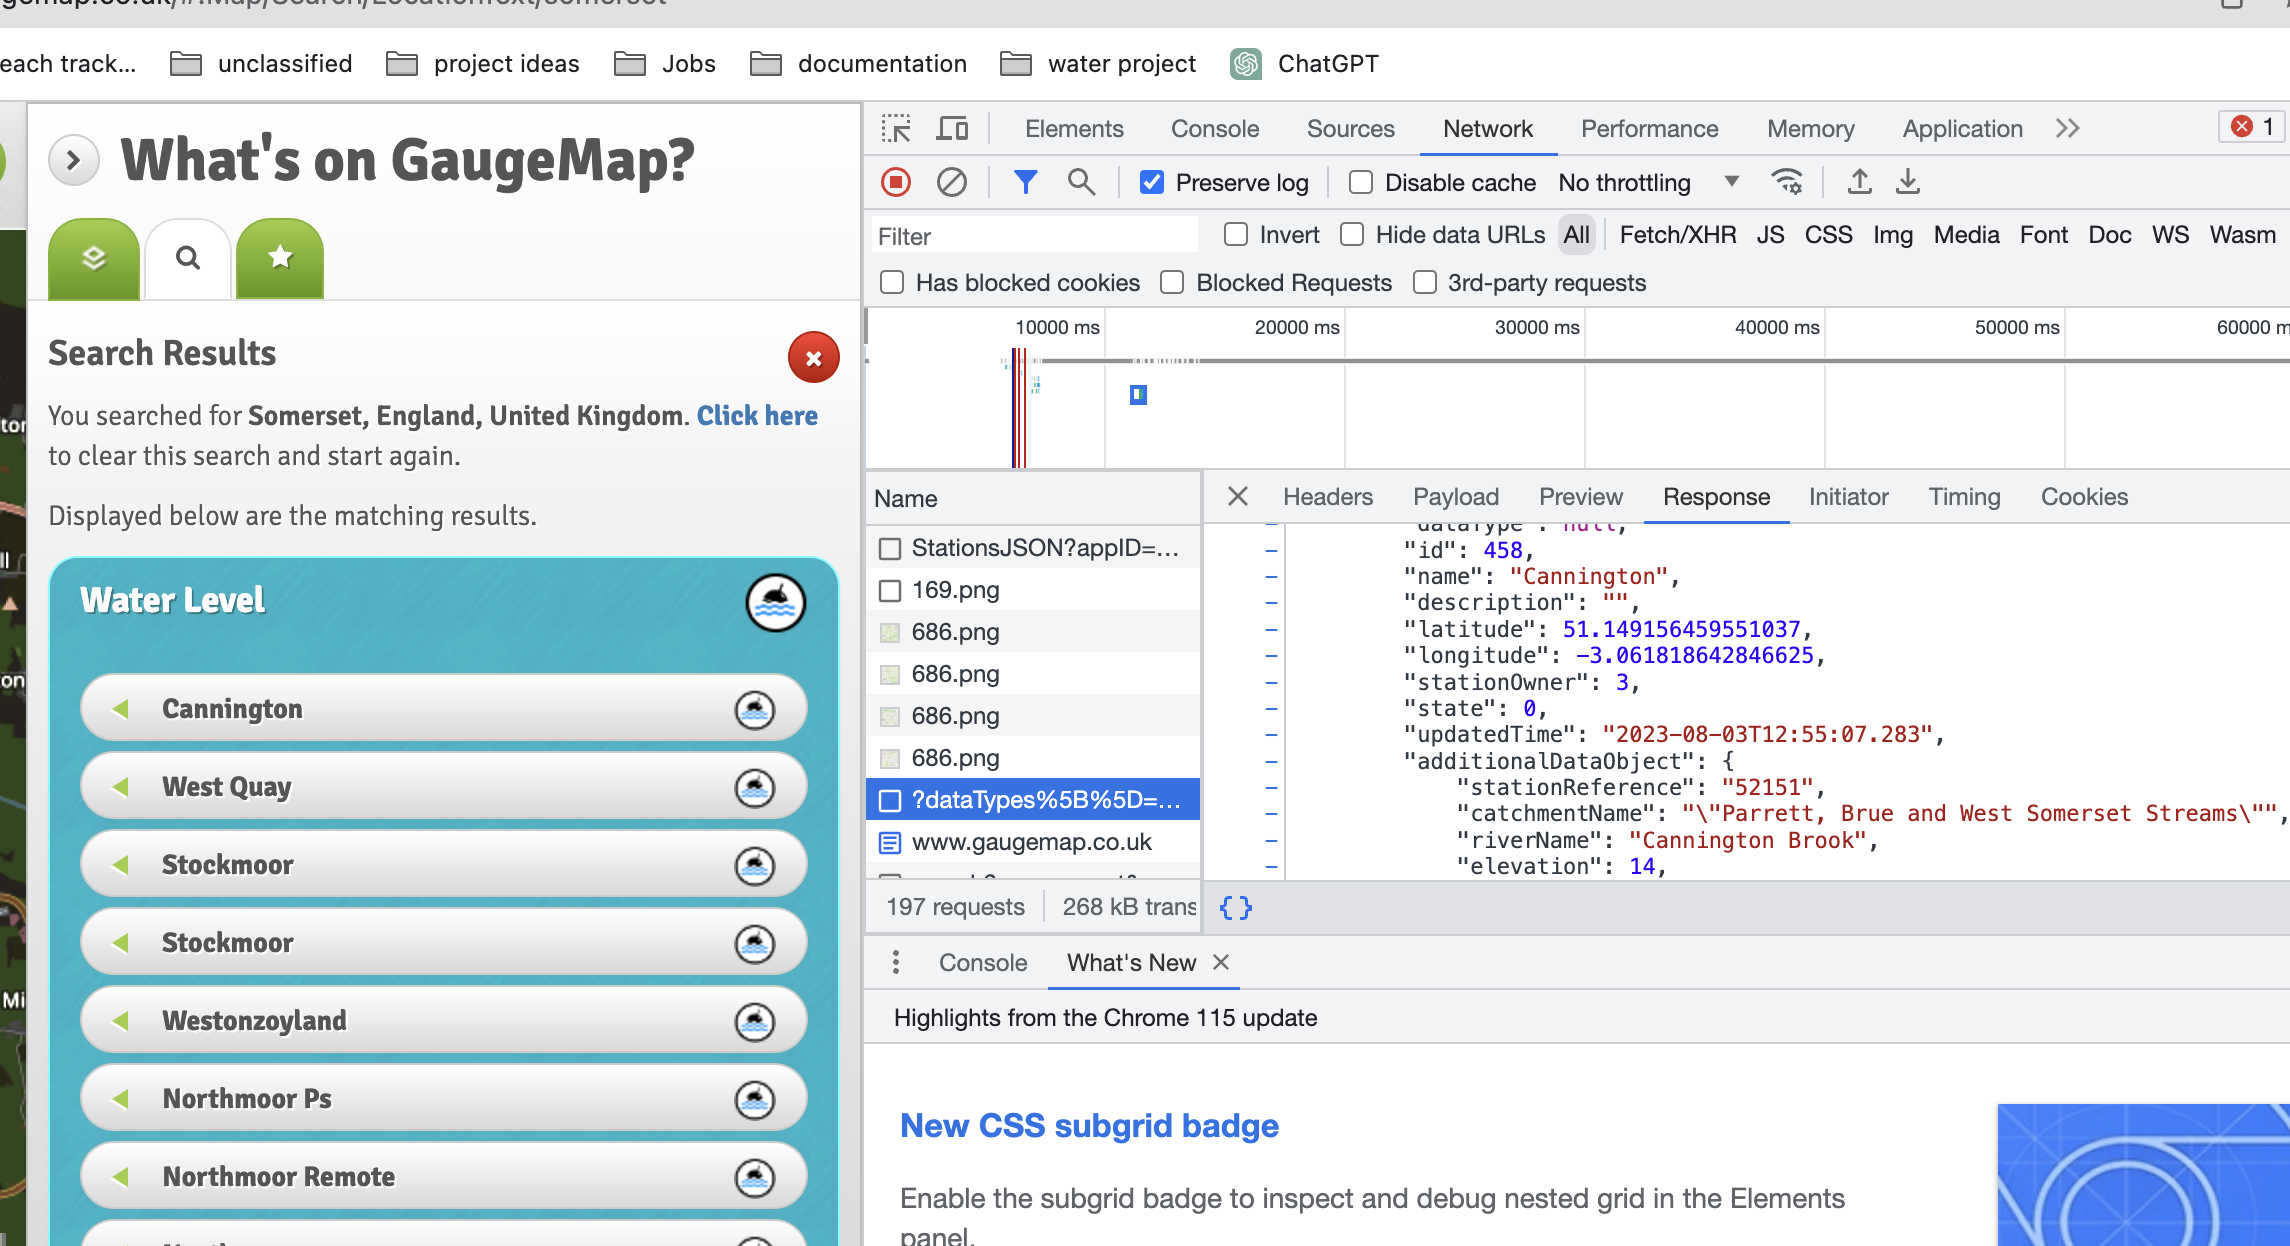

In [4]:
Image(filename='/Users/antonfreidin/water_project/screenshots for decoration/Screenshot 2023-08-03 at 14.24.45.png')

In [18]:
resp1 = requests.get('https://riverlevelsapi.azurewebsites.net/Kml/StationsJSON?appID=GaugeMap', headers=headers)
data1 = resp1.json()
df_resp1 = pd.DataFrame(data1)
df_resp1.drop(['StyleUrl','Layer','State'], inplace=True, axis=1)
df_resp1.set_index('Id', inplace=True)
df_resp1.to_csv('station_ids_to_coordinates.csv')

In [7]:
url2 = 'https://riverlevelsapi.azurewebsites.net/TimeSeries/GetNearestTimeSeriesStations/?dataTypes%5B%5D=1&dataTypes%5B%5D=3&dataTypes%5B%5D=4&dataTypes%5B%5D=5&dataTypes%5B%5D=25&dataTypes%5B%5D=26&dataTypes%5B%5D=27&dataTypes%5B%5D=28&dataTypes%5B%5D=29&dataTypes%5B%5D=30&dataTypes%5B%5D=31&dataTypes%5B%5D=32&dataTypes%5B%5D=33&dataTypes%5B%5D=34&dataTypes%5B%5D=35&dataTypes%5B%5D=40&latitude=51.161750850000004&longitude=-3.0753867062227487&count=10'
resp2 = requests.get(url2, headers=headers)
data2 = resp2.json()
df2 = pd.DataFrame(data2)
# df2.info()
df2

distanceMeters dataType     id              name description   latitude  \
0     1692.052925     None    458        Cannington              51.149156   
1     6253.984916     None    453         West Quay              51.129905   
2     7630.862516     None  13456         STOCKMOOR  Discovered  51.116600   
3     7662.353932     None  13455         STOCKMOOR  Discovered  51.116400   
4    12129.533178     None  13457     WESTONZOYLAND  Discovered  51.090700   
5    12502.962887     None   1371     Northmoor PS               51.073445   
6    12506.970039     None   9752  NORTHMOOR REMOTE  Discovered  51.073400   
7    12506.970039     None  13447         NORTHMOOR  Discovered  51.073400   
8    14511.903661     None  13454          SALTMOOR  Discovered  51.072900   
9    14511.903661     None  13452          SALTMOOR  Discovered  51.072900   

   longitude  stationOwner  state              updatedTime  \
0  -3.061819             3      0  2023-08-05T10:35:11.067   
1  -3.001611             3      0   2023-08-05T10:36:10.02   
2  -2.993180             3      0    2023-08-05T10:30:25.1   
3  -2.992860             3      0  2023-08-05T10:33:52.443   
4  -2.943760             3      0  2023-08-05T10:41:01.937   
5  -2.964821             3      0  2023-08-05T10:42:17.647   
6  -2.964820             3      0  2023-08-05T10:45:25.783   
7  -2.964820             3      0  2023-08-05T10:45:35.517   
8  -2.923420             3      0   2021-04-07T11:22:31.14   
9  -2.923420             3      0    2023-08-05T10:33:35.8   

                                additionalDataObject  \
0  {'stationReference': '52151', 'catchmentName':...   
1  {'stationReference': '52124', 'catchmentName':...   
2  {'stationReference': '52243', 'region': 'South...   
3  {'stationReference': '52242', 'region': 'South...   
4  {'stationReference': '52245', 'region': 'South...   
5  {'stationReference': '52145', 'catchmentName':...   
6  {'stationReference': '52159', 'catchmentName':...   
7  {'stationReference': '52236', 'region': 'South...   
8  {'stationReference': '52239', 'region': 'South...   
9  {'stationReference': '52240', 'region': 'South...   

                                           gaugeList  \
0  [{'id': 464, 'geoEntityId': 458, 'dataTypeId':...   
1  [{'id': 459, 'geoEntityId': 453, 'dataTypeId':...   
2  [{'id': 8883, 'geoEntityId': 13456, 'dataTypeI...   
3  [{'id': 8882, 'geoEntityId': 13455, 'dataTypeI...   
4  [{'id': 8884, 'geoEntityId': 13457, 'dataTypeI...   
5  [{'id': 1517, 'geoEntityId': 1371, 'dataTypeId...   
6  [{'id': 5119, 'geoEntityId': 9752, 'dataTypeId...   
7  [{'id': 8874, 'geoEntityId': 13447, 'dataTypeI...   
8  [{'id': 8881, 'geoEntityId': 13454, 'dataTypeI...   
9  [{'id': 8879, 'geoEntityId': 13452, 'dataTypeI...   

   stationWaterLevelStatisticsType  
0                                2  
1                                4  
2                                4  
3                                4  
4                                4  
5                                2  
6                                2  
7                                4  
8                                4  
9                                4

Cool, let's try getting the datapoints for the last 10 years of a particular catchment area 
The catchment area is used a logical unit : let's be **ambitious** and try the Thames

https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByCatchmentName/?catchmentName=Thames+from+Hurley+to+Teddington : this endpoint returns a JSON of the relevant station details for stations in this catchment

This structure:  "dataType": null,
        "id": 1122,
        "name": "Hurley Lock",
        "description": "",
        "latitude": 51.551357283594541,
        "longitude": -0.80841389107623873,
        "stationOwner": 3,
        "state": 0,
        "updatedTime": "2023-08-05T11:35:01.683",
        "additionalDataObject": {
            "stationReference": "2497TH",
            "catchmentName": "Thames from Hurley to Teddington",
            "riverName": "Thames",
            "elevation": 31,
            "stationType": "M",
            "region": "Thames",
            "ordinal": 3100,
            "riverGroupingId": 0,
            "riverGroupingName": "Thames",
            "siteId": "7156",
            "stageDatum": "29.19",
            "dateOpen": "2006-01-01T00:00:00",
            "town": "Hurley",
            "areaName": "Thames - West Thames",
            "rloIid": "7156",
            "notation": "2497TH",
            "wiskiID": "2497TH"
        },

In [23]:
endpoint_url_station_details_thames ='https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesStationsByCatchmentName/?catchmentName=Thames+from+Hurley+to+Teddington'
response_station_details_thames = requests.get(endpoint_url_station_details_thames, headers=headers)
thames_station_details_data = response_station_details_thames.json()
thames_station_details_data
# loop through this to get the station IDs we require, to pass in to a new request for the river levels time-series datapoints

thames_station_details = []

for record in thames_station_details_data:
    thames_station_details.append({'station_name': record['name'], 'id': record['id']})
    
thames_station_details    

[{'station_name': 'Hurley Lock', 'id': 1122},
 {'station_name': 'Marlow Lock', 'id': 1123},
 {'station_name': 'Cookham Lock', 'id': 1129},
 {'station_name': 'Boulters Lock ', 'id': 1130},
 {'station_name': 'Taplow', 'id': 1131},
 {'station_name': 'Maidenhead', 'id': 1132},
 {'station_name': 'Bray Lock', 'id': 1133},
 {'station_name': 'Raymill Road', 'id': 1139},
 {'station_name': 'Romney Lock', 'id': 1145},
 {'station_name': 'Windsor Park', 'id': 1146},
 {'station_name': 'Bell Weir', 'id': 1147},
 {'station_name': 'Old Windsor Lock', 'id': 1148},
 {'station_name': 'Staines', 'id': 1192},
 {'station_name': 'Penton Hook', 'id': 1193},
 {'station_name': 'Chertsey Lock ', 'id': 1194},
 {'station_name': 'Shepperton Lock ', 'id': 1195},
 {'station_name': 'Walton', 'id': 1224},
 {'station_name': 'Sunbury  Lock', 'id': 1225},
 {'station_name': 'Molesey Lock', 'id': 1226},
 {'station_name': 'Thames Ditton Island', 'id': 1227},
 {'station_name': 'Kingston', 'id': 1249},
 {'station_name': 'Teddin

In [25]:
ids_stations_thames = [station ['id'] for station in thames_station_details]

In [26]:
ids_stations_thames

[1122,
 1123,
 1129,
 1130,
 1131,
 1132,
 1133,
 1139,
 1145,
 1146,
 1147,
 1148,
 1192,
 1193,
 1194,
 1195,
 1224,
 1225,
 1226,
 1227,
 1249,
 1250,
 1251]

Loop through the above to build requests for the datapoints


In [ ]:
https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId=9051&dataType=3&endTime=2023-08-31T22%3A59%3A59&startTime=2013-04-30T23%3A00%3A00&smoothing=2


In [27]:

station_ids = ids_stations_thames # replace with your list of station IDs

base_url = "https://riverlevelsapi.azurewebsites.net/TimeSeries/GetTimeSeriesDatapointsDateTime/?stationId={station_id}&dataType=3&endTime=2023-08-31T22%3A59%3A59&startTime=2013-04-30T23%3A00%3A00&smoothing=2"


for station_id in station_ids:
    url = base_url.format(station_id=station_id)  # generate URL for this station
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = json.loads(response.text)
        df = pd.json_normalize(data)  # create DataFrame from JSON
        df.to_csv(f'station_{station_id}.csv', index=False)  # save DataFrame to a CSV file
    else:
        print(f"Request failed for station {station_id}, status code: {response.status_code}")


## And, just like that we've got 10 years of measurements of water levels at all river gauges for the catchment Thames from Hurley to Teddington!
